In [109]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
f_0 = 300
mu = 8e5
a = 0
b = 1e-2
N = 1000
t_ax = np.linspace(a,b,N)

x_t = lambda t : np.cos(2 * np.pi * f_0 * t + mu * t**2)

beta = 3e3
A = 0.5
dt = 2e-3

kernel = lambda t : np.exp(- beta * t) + A * np.exp(- beta * t - dt)

In [111]:
def conv(kernel, func, t_ax):
    result = np.zeros(len(t_ax))
    K = kernel(t_ax)
    F = func(t_ax)[::-1]
    for i in range(len(t_ax)):
        result[i] = np.sum(K * np.roll(F, i + 1))
    return result

In [112]:
f_t = conv(kernel, x_t, t_ax)

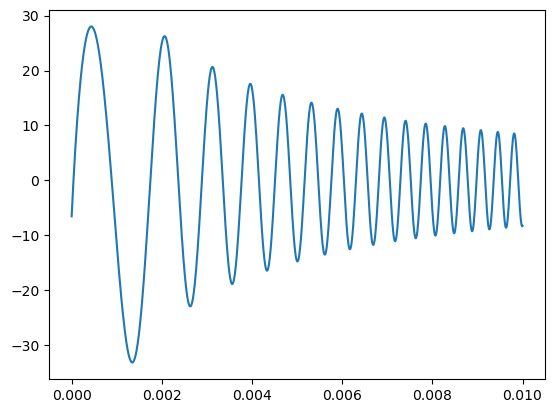

In [113]:
plt.plot(t_ax, f_t)

In [114]:
sigma = 7e-2
noise = np.random.normal(0, sigma, len(t_ax))

In [115]:
noise = np.random.normal(0, 1e-1, len(f_t))
f_d = f_t + noise

In [116]:
def fourierSolve(f, ker, t, alpha):
    F_d = np.fft.fft(f)
    kernel_ar = ker(t)
    kernel_fft = np.fft.fft(kernel_ar)
    m_omega = lambda omega: omega ** 2 + 1e-4
    freq_ax = np.fft.fftfreq(len(t_ax), t_ax[1] - t_ax[0])
    m_ar = m_omega(freq_ax)
    x_alpha_fft = (F_d * kernel_fft.conj()) / (kernel_fft.conj() * kernel_fft + alpha * m_ar)
    x_alpha = np.fft.ifft(x_alpha_fft).real
    return x_alpha

In [133]:
alphaRange = np.logspace(-13, -8, 1000)
avgSol = np.zeros_like(t_ax)
for alpha in alphaRange:
    avgSol += fourierSolve(f_d, kernel, t_ax, alpha)
avgSol /= len(alphaRange)

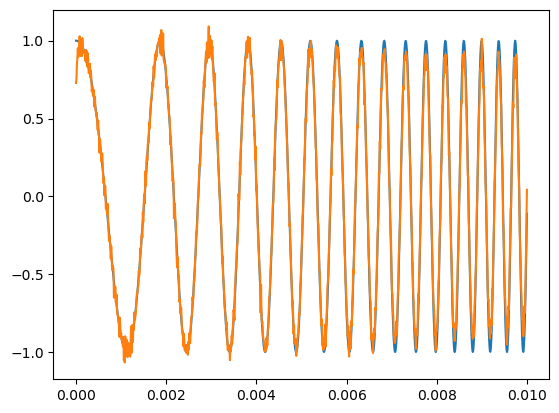

In [134]:
plt.plot(t_ax, x_t(t_ax), label='настоящее решение')
plt.plot(t_ax, avgSol, label='усреднённое')